# Edited by Ashen; 微信公众号:爱研思谈; Github:AshenOneme

## OpenSees分析步骤  
#### 建立本构材料-->建立截面-->建立节点-->建立坐标转换-->连接节点-->建立记录信息-->建立分析步-->施加荷载
#### Case1以一根混凝土柱作为分析对象，浅析OpenSeespy的基本分析步骤

## 导入OpenSees包和绘图包

In [381]:
import openseespy.opensees as ops
import opsvis as opsv
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator,FormatStrFormatter
from pylab import *

## 定义自由度

In [382]:
ops.wipe() # 初始清空
ops.model('basic', '-ndm', 2, '-ndf', 3)  # frame 2D

## 建立本构材料

In [383]:
IDSteel = 1
Fy_Steel = 400
E0_Steel = 206000
bs_Steel = 0.005
R0 = 12.5
cR1 = 0.925
cR2 = 0.15
ops.uniaxialMaterial('Steel02', IDSteel, Fy_Steel, E0_Steel, bs_Steel,R0,cR1,cR2)

IDcoverC=2
fpc_cover=-40
epsc0_cover=-0.002
fpcu_cover=-8
epsU_cover=-0.004
ops.uniaxialMaterial('Concrete01', IDcoverC, fpc_cover, epsc0_cover, fpcu_cover, epsU_cover)

IDcoreC=3
fpc_core=-40
epsc0_core=-0.0024
fpcu_core=-18
epsU_core=-0.006
ops.uniaxialMaterial('Concrete01', IDcoreC, fpc_core, epsc0_core, fpcu_core, epsU_core)

IDBond_SP01=6
Fy=335
Sy=0.02
Fu=500
Su=0.7
b=0.4
R=0.6
ops.uniaxialMaterial('Bond_SP01', IDBond_SP01, Fy, Sy, Fu, Su, b, R)

# =============材料测试环节可忽略============= #

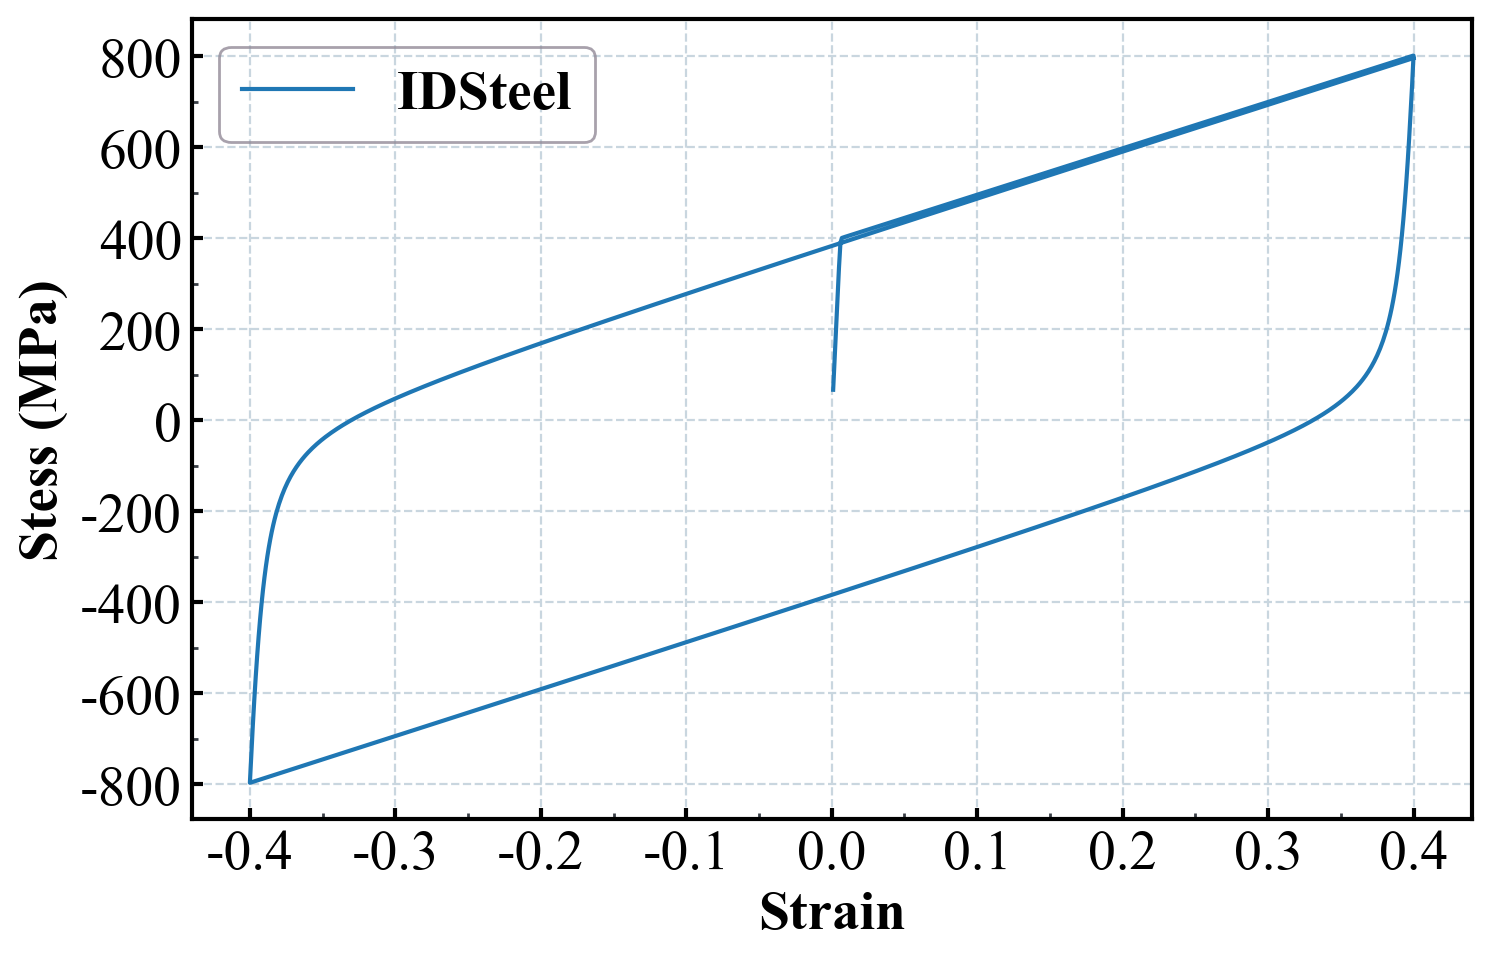

In [384]:
ops.wipe() # 初始清空
ops.model('basic', '-ndm', 2, '-ndf', 3)  # frame 2D
IDSteel = 1
Fy_Steel = 400
E0_Steel = 206000
bs_Steel = 0.005
R0 = 12.5
cR1 = 0.925
cR2 = 0.15
ops.uniaxialMaterial('Steel02', IDSteel, Fy_Steel, E0_Steel, bs_Steel,R0,cR1,cR2)
ops.node(1,0,0)
ops.node(2,100,0)
ops.equalDOF(1,2,2,3)
ops.fix(1,1,1,1)
ops.fix(2,0,1,1)
ops.element('twoNodeLink',1,1,2,'-mat',IDSteel,'-dir',1)
ops.recorder('Node', '-file', "IDSteel_Disp.txt","-time",'-node', 2, '-dof',1, 'disp')
ops.recorder('Node', '-file', "IDSteel_Reaction.txt","-time",'-node', 1, '-dof',1, 'reaction')
ops.timeSeries('Linear', 11)
ops.pattern('Plain', 100,11)
ops.sp(2,1,1)
ops.system("BandGeneral")
ops.numberer("RCM")
ops.constraints("Penalty",1e5,1e5)
ops.test('NormDispIncr', 1e-5, 2000)
ops.algorithm("KrylovNewton")

ops.integrator("DisplacementControl",2,1,-0.001)
ops.analysis("Static")
ops.analyze(400)

ops.integrator("DisplacementControl",2,1,0.001)
ops.analysis("Static")
ops.analyze(800)

ops.integrator("DisplacementControl",2,1,-0.001)
ops.analysis("Static")
ops.analyze(800)
ops.wipe()

Disp=np.loadtxt('IDSteel_Disp.txt',usecols=1)
Force=np.loadtxt('IDSteel_Reaction.txt',usecols=1)
font_Times_New_Roman={"family":"Times New Roman",
                      # "style": "italic",
                      "weight":"heavy",
                      "size":20}
font_Song={"family":"SimSun",
           "style":"italic",
           "weight":"heavy",
           "size":20}
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rc('axes', unicode_minus=False)
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(8,5),dpi=200)
fig.subplots_adjust(left=0.15,right=0.95,top=0.95,bottom=0.15)
bwith = 1.5 
TK = plt.gca()
TK.spines['bottom'].set_linewidth(bwith)
TK.spines['left'].set_linewidth(bwith)
TK.spines['top'].set_linewidth(bwith)
TK.spines['right'].set_linewidth(bwith)
plt.plot(-Disp,Force,label='IDSteel')
x_major_locator=MultipleLocator(0.1)
ax.xaxis.set_major_locator(x_major_locator)
y_major_locator=MultipleLocator(200)
ax.yaxis.set_major_locator(y_major_locator)
x_minor_locator=MultipleLocator(0.05)
ax.xaxis.set_minor_locator(x_minor_locator)
y_minor_locator=MultipleLocator(100)
ax.yaxis.set_minor_locator(y_minor_locator)
ax.tick_params(axis='x',which='major',direction='in',labelsize=20,length=4,width=1.5) 
ax.tick_params(axis='x',which='minor',direction='in',color='#393e46',labelsize=20,length=2,width=1)
ax.tick_params(axis='y',which='major',direction='in',labelsize=20,length=4,width=1.5)
ax.tick_params(axis='y',which='minor',direction='in',color='#393e46',labelsize=20,length=2,width=1) 
ax.grid(linestyle='--',color='#c9d6df')                      
ax.set_xlabel('Strain',fontproperties=font_Times_New_Roman)
ax.set_ylabel('Stess (MPa)',fontproperties=font_Times_New_Roman)
plt.legend(prop=font_Times_New_Roman,edgecolor='#928a97',facecolor='none')
plt.show()

# =============材料测试环节可忽略============= #

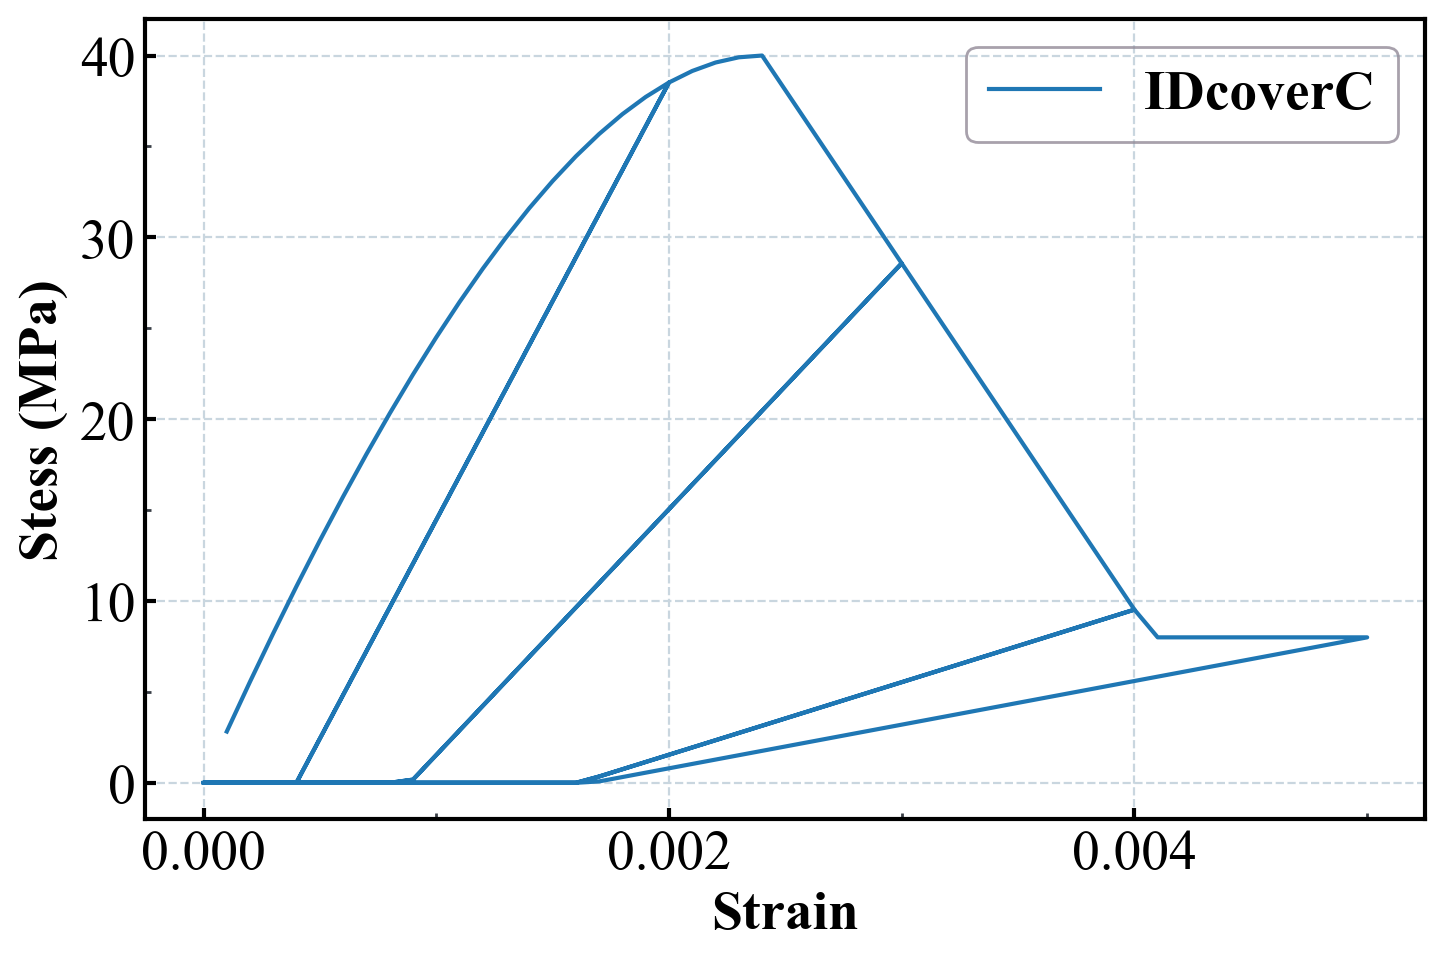

In [385]:
ops.wipe() # 初始清空
ops.model('basic', '-ndm', 2, '-ndf', 3)  # frame 2D
IDcoverC=2
fpc_cover=-40
epsc0_cover=-0.002
fpcu_cover=-8
epsU_cover=-0.004
ops.uniaxialMaterial('Concrete01', IDcoverC, fpc_cover, epsc0_cover, fpcu_cover, epsU_cover)
ops.node(1,0,0)
ops.node(2,100,0)
ops.equalDOF(1,2,2,3)
ops.fix(1,1,1,1)
ops.fix(2,0,1,1)
ops.element('twoNodeLink',1,1,2,'-mat',IDcoverC,'-dir',1)
ops.recorder('Node', '-file', "IDcoverC_Disp.txt","-time",'-node', 2, '-dof',1, 'disp')
ops.recorder('Element', '-file', "IDcoverC_Reaction.txt","-time",'-ele', 1, '-dof',1, 'localForce')
ops.timeSeries('Linear', 11)
ops.pattern('Plain', 100,11)
ops.sp(2,1,1)
ops.system("BandGeneral")
ops.numberer("RCM")
ops.constraints("Penalty",1e5,1e5)
ops.test('NormDispIncr', 1e-5, 2000)
ops.algorithm("KrylovNewton")

ops.integrator("DisplacementControl",2,1,-0.0001)
ops.analysis("Static")
ops.analyze(20)

ops.integrator("DisplacementControl",2,1,0.0001)
ops.analysis("Static")
ops.analyze(20)

ops.integrator("DisplacementControl",2,1,-0.0001)
ops.analysis("Static")
ops.analyze(30)

ops.integrator("DisplacementControl",2,1,0.0001)
ops.analysis("Static")
ops.analyze(30)

ops.integrator("DisplacementControl",2,1,-0.0001)
ops.analysis("Static")
ops.analyze(40)

ops.integrator("DisplacementControl",2,1,0.0001)
ops.analysis("Static")
ops.analyze(40)

ops.integrator("DisplacementControl",2,1,-0.0001)
ops.analysis("Static")
ops.analyze(50)

ops.integrator("DisplacementControl",2,1,0.0001)
ops.analysis("Static")
ops.analyze(50)


ops.wipe()

Disp=np.loadtxt('IDcoverC_Disp.txt',usecols=1)
Force=np.loadtxt('IDcoverC_Reaction.txt',usecols=1)
font_Times_New_Roman={"family":"Times New Roman",
                      # "style": "italic",
                      "weight":"heavy",
                      "size":20}
font_Song={"family":"SimSun",
           "style":"italic",
           "weight":"heavy",
           "size":20}
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rc('axes', unicode_minus=False)
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(8,5),dpi=200)
fig.subplots_adjust(left=0.15,right=0.95,top=0.95,bottom=0.15)
bwith = 1.5 
TK = plt.gca()
TK.spines['bottom'].set_linewidth(bwith)
TK.spines['left'].set_linewidth(bwith)
TK.spines['top'].set_linewidth(bwith)
TK.spines['right'].set_linewidth(bwith)
plt.plot(-Disp,Force,label='IDcoverC')
x_major_locator=MultipleLocator(0.002)
ax.xaxis.set_major_locator(x_major_locator)
y_major_locator=MultipleLocator(10)
ax.yaxis.set_major_locator(y_major_locator)
x_minor_locator=MultipleLocator(0.001)
ax.xaxis.set_minor_locator(x_minor_locator)
y_minor_locator=MultipleLocator(5)
ax.yaxis.set_minor_locator(y_minor_locator)
ax.tick_params(axis='x',which='major',direction='in',labelsize=20,length=4,width=1.5) 
ax.tick_params(axis='x',which='minor',direction='in',color='#393e46',labelsize=20,length=2,width=1)
ax.tick_params(axis='y',which='major',direction='in',labelsize=20,length=4,width=1.5)
ax.tick_params(axis='y',which='minor',direction='in',color='#393e46',labelsize=20,length=2,width=1) 
ax.grid(linestyle='--',color='#c9d6df')                      
ax.set_xlabel('Strain',fontproperties=font_Times_New_Roman)
ax.set_ylabel('Stess (MPa)',fontproperties=font_Times_New_Roman)
plt.legend(prop=font_Times_New_Roman,edgecolor='#928a97',facecolor='none')
plt.show()

In [386]:
ops.wipe() # 初始清空
ops.model('basic', '-ndm', 2, '-ndf', 3)  # frame 2D
IDSteel = 1
Fy_Steel = 400
E0_Steel = 206000
bs_Steel = 0.005
R0 = 12.5
cR1 = 0.925
cR2 = 0.15
ops.uniaxialMaterial('Steel02', IDSteel, Fy_Steel, E0_Steel, bs_Steel,R0,cR1,cR2)

IDcoverC=2
fpc_cover=-40
epsc0_cover=-0.002
fpcu_cover=-8
epsU_cover=-0.004
ops.uniaxialMaterial('Concrete01', IDcoverC, fpc_cover, epsc0_cover, fpcu_cover, epsU_cover)

IDcoreC=3
fpc_core=-40
epsc0_core=-0.0024
fpcu_core=-18
epsU_core=-0.006
ops.uniaxialMaterial('Concrete01', IDcoreC, fpc_core, epsc0_core, fpcu_core, epsU_core)

IDBond_SP01=6
Fy=335
Sy=0.02
Fu=500
Su=0.7
b=0.4
R=0.6
ops.uniaxialMaterial('Bond_SP01', IDBond_SP01, Fy, Sy, Fu, Su, b, R)

## 建立截面
#### ['patch', 'rect', matTag, num_fiberY, num_fiberZ, YI, ZI, YJ, ZJ]
rect:矩形截面 
matTag:材料编号  
num_fiberY:y向纤维数   
num_fiberZ:z向纤维数  
YI, ZI:起始坐标
YJ, ZJ终点坐标

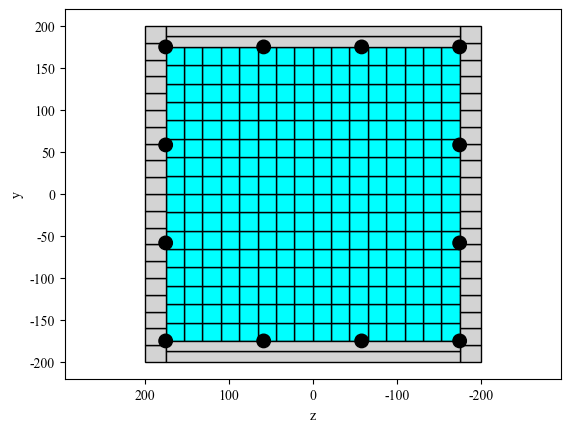

In [387]:
Bcol = 400
Hcol = Bcol

#cover
c=25

y1col = Hcol/2.0
z1col = Bcol/2.0
y2col = 0.5*(Hcol-2*c)/3.0

nFibZ=1
nFibZc=16
nFib=20
nFibCover, nFibCore = 2, 16
As_bar1 = 200.96
As_bar2 = 78.5


# ['patch', 'rect', matTag, num_fiberY, num_fiberZ, YI, ZI, YJ, ZJ],
fiber_column_section=1
ops.section('Fiber', fiber_column_section)
ops.patch('rect', IDcoreC, nFibCore, nFibZc, c-y1col, c-z1col, y1col-c, z1col-c)
ops.patch('rect', IDcoverC, nFib, nFibZ, -y1col, -z1col, y1col, c-z1col)
ops.patch('rect', IDcoverC, nFib, nFibZ, -y1col, z1col-c, y1col, z1col)
ops.patch('rect', IDcoverC, nFibCover, nFibZ, -y1col, c-z1col, c-y1col, z1col-c)
ops.patch('rect', IDcoverC, nFibCover, nFibZ, y1col-c, c-z1col, y1col, z1col-c)
ops.layer('straight', IDSteel, 4, As_bar1, y1col-c, z1col-c, y1col-c, c-z1col)
ops.layer('straight', IDSteel, 2, As_bar1, y2col, z1col-c, y2col, c-z1col)
ops.layer('straight', IDSteel, 2, As_bar1, -y2col, z1col-c, -y2col, c-z1col)
ops.layer('straight', IDSteel, 4, As_bar1, c-y1col, z1col-c, c-y1col, c-z1col)

fiber_column_section2=[['section', 'Fiber', 1],
                     ['patch', 'rect', IDcoreC, nFibCore, nFibZc, c-y1col, c-z1col, y1col-c, z1col-c],
                     ['patch', 'rect', IDcoverC, nFib, nFibZ, -y1col, -z1col, y1col, c-z1col],
                     ['patch', 'rect', IDcoverC, nFib, nFibZ, -y1col, z1col-c, y1col, z1col],
                     ['patch', 'rect', IDcoverC, nFibCover, nFibZ, -y1col, c-z1col, c-y1col, z1col-c],
                     ['patch', 'rect', IDcoverC, nFibCover, nFibZ, y1col-c, c-z1col, y1col, z1col-c],
                     ['layer', 'straight', IDSteel, 4, As_bar1, y1col-c, z1col-c, y1col-c, c-z1col],
                     ['layer', 'straight', IDSteel, 2, As_bar1, y2col, z1col-c, y2col, c-z1col],
                     ['layer', 'straight', IDSteel, 2, As_bar1, -y2col, z1col-c, -y2col, c-z1col],
                     ['layer', 'straight', IDSteel, 4, As_bar1, c-y1col, z1col-c, c-y1col, c-z1col]]

matcolor = ['red', 'lightgrey', 'cyan', 'w', 'w', 'w']
opsv.plot_fiber_section(fiber_column_section2, matcolor=matcolor)
plt.axis('equal')
plt.show()

## 建立节点

In [388]:
# 节点坐标(x,y)
ops.node(1,0,0)
ops.node(2,0,800)
ops.node(3,0,1600)
ops.node(4,0,2400)
ops.node(5,0,3200)

#1节点的x平动,y平动,转动固定
ops.fix(1,1,1,1)

## 建立坐标转换

In [389]:
coordTransf = "Linear"  # Linear, PDelta, Corotational
IDColumnTransf=1
ops.geomTransf(coordTransf, IDColumnTransf)
numIntgrPts=4

## 连接节点

In [390]:
ops.element('nonlinearBeamColumn', 1, 1 ,2, numIntgrPts, fiber_column_section, IDColumnTransf)
ops.element('nonlinearBeamColumn', 2, 2, 3, numIntgrPts, fiber_column_section ,IDColumnTransf)
ops.element('nonlinearBeamColumn', 3, 3, 4, numIntgrPts, fiber_column_section ,IDColumnTransf)
ops.element('nonlinearBeamColumn', 4, 4, 5, numIntgrPts, fiber_column_section ,IDColumnTransf)

<AxesSubplot:>

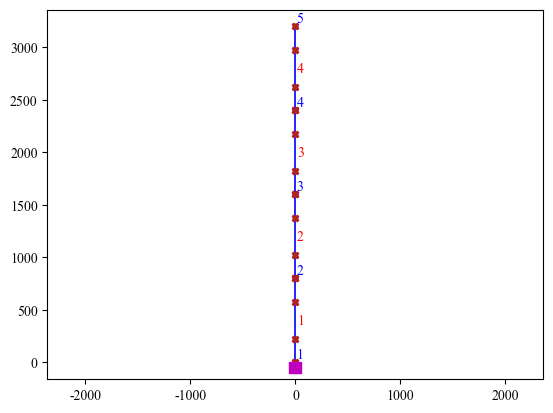

In [391]:
opsv.plot_model("node","elements")

## 施加轴压

In [392]:
ops.timeSeries('Linear', 11)
ops.pattern('Plain', 100,11)
ops.load(5,0,-9.17e5,0)
ops.constraints("Penalty",1e15,1e15)
ops.numberer("RCM")
ops.system("BandGeneral")
ops.test('NormDispIncr', 1e-5, 2000)
ops.algorithm("KrylovNewton")
ops.integrator("LoadControl",0.1)
ops.analysis("Static")
ops.analyze(10)
ops.loadConst("-time",0.0)

## 建立节点记录

In [393]:
ops.recorder('Node', '-file', "Disp.txt","-time",'-node', 5, '-dof',1, 'disp')
ops.recorder('Node', '-file', "Reaction.txt","-time",'-node', 1, '-dof',1, 'reaction')

185

## 建立分析步+施加荷载

In [394]:
ops.timeSeries('Linear', 22)
ops.pattern( "Plain", 200,22)
ops.sp(5,1,1)
ops.test('NormDispIncr', 1e-5, 2000)

ops.integrator("DisplacementControl",5,1,-0.01)
ops.analysis("Static")
ops.analyze(200*10)

ops.integrator("DisplacementControl",5,1,0.01)
ops.analysis("Static")
ops.analyze(400*10)

ops.integrator("DisplacementControl",5,1,-0.01)
ops.analysis("Static")
ops.analyze(600*10)

ops.integrator("DisplacementControl",5,1,0.01)
ops.analysis("Static")
ops.analyze(800*10)

ops.integrator("DisplacementControl",5,1,-0.01)
ops.analysis("Static")
ops.analyze(1000*10)

ops.integrator("DisplacementControl",5,1,0.01)
ops.analysis("Static")
ops.analyze(1200*10)

ops.integrator("DisplacementControl",5,1,-0.01)
ops.analysis("Static")
ops.analyze(1400*10)

ops.integrator("DisplacementControl",5,1,0.01)
ops.analysis("Static")
ops.analyze(1600*10)

ops.integrator("DisplacementControl",5,1,-0.01)
ops.analysis("Static")
ops.analyze(1800*10)

ops.integrator("DisplacementControl",5,1,0.01)
ops.analysis("Static")
ops.analyze(2000*10)

ops.integrator("DisplacementControl",5,1,-0.01)
ops.analysis("Static")
ops.analyze(2200*10)

ops.integrator("DisplacementControl",5,1,0.01)
ops.analysis("Static")
ops.analyze(2400*10)

ops.integrator("DisplacementControl",5,1,-0.01)
ops.analysis("Static")
ops.analyze(2600*10)

ops.integrator("DisplacementControl",5,1,0.01)
ops.analysis("Static")
ops.analyze(2800*10)

ops.integrator("DisplacementControl",5,1,-0.01)
ops.analysis("Static")
ops.analyze(3000*10)

ops.integrator("DisplacementControl",5,1,0.01)
ops.analysis("Static")
ops.analyze(3200*10)

ops.integrator("DisplacementControl",5,1,-0.01)
ops.analysis("Static")
ops.analyze(3400*10)

ops.integrator("DisplacementControl",5,1,0.01)
ops.analysis("Static")
ops.analyze(3600*10)

ops.integrator("DisplacementControl",5,1,-0.01)
ops.analysis("Static")
ops.analyze(3800*10)

0

## 计算结果

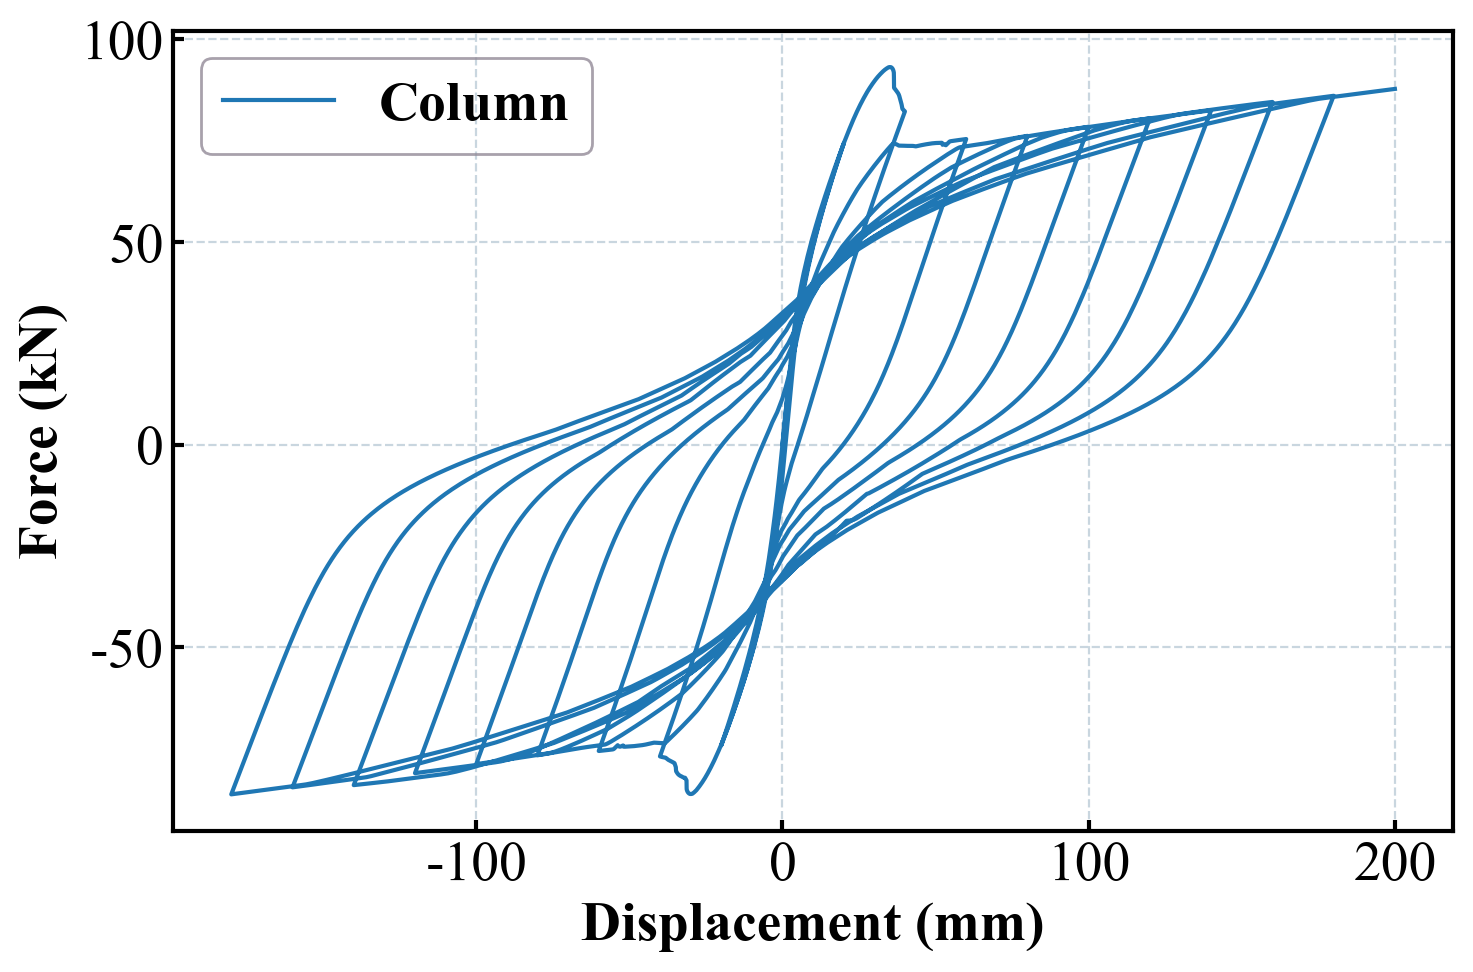

In [395]:
ops.wipe()

Disp=np.loadtxt('Disp.txt',usecols=1)
Force=np.loadtxt('Reaction.txt',usecols=1)
font_Times_New_Roman={"family":"Times New Roman",
                      # "style": "italic",
                      "weight":"heavy",
                      "size":20}
font_Song={"family":"SimSun",
           "style":"italic",
           "weight":"heavy",
           "size":20}
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rc('axes', unicode_minus=False)
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(8,5),dpi=200)
fig.subplots_adjust(left=0.15,right=0.95,top=0.95,bottom=0.15)
bwith = 1.5 
TK = plt.gca()
TK.spines['bottom'].set_linewidth(bwith)
TK.spines['left'].set_linewidth(bwith)
TK.spines['top'].set_linewidth(bwith)
TK.spines['right'].set_linewidth(bwith)
plt.plot(-Disp,Force/1000,label='Column')
# x_major_locator=MultipleLocator(0.002)
# ax.xaxis.set_major_locator(x_major_locator)
# y_major_locator=MultipleLocator(10)
# ax.yaxis.set_major_locator(y_major_locator)
# x_minor_locator=MultipleLocator(0.001)
# ax.xaxis.set_minor_locator(x_minor_locator)
# y_minor_locator=MultipleLocator(5)
# ax.yaxis.set_minor_locator(y_minor_locator)
ax.tick_params(axis='x',which='major',direction='in',labelsize=20,length=4,width=1.5) 
ax.tick_params(axis='x',which='minor',direction='in',color='#393e46',labelsize=20,length=2,width=1)
ax.tick_params(axis='y',which='major',direction='in',labelsize=20,length=4,width=1.5)
ax.tick_params(axis='y',which='minor',direction='in',color='#393e46',labelsize=20,length=2,width=1) 
ax.grid(linestyle='--',color='#c9d6df')                      
ax.set_xlabel('Displacement (mm)',fontproperties=font_Times_New_Roman)
ax.set_ylabel('Force (kN)',fontproperties=font_Times_New_Roman)
plt.legend(prop=font_Times_New_Roman,edgecolor='#928a97',facecolor='none')
plt.show()